# Johanes Andrian Kartono 03729894

## Simulation Study II

### Task 3.5.1

In this task, you are going to analyse the packet arrival process when the number of users
increase. There is a new counter cnt_iat in StatisticsCollection that counts the inter-arrival
times of packets to the system from all the users. The counting is already implemented for
you.

For this task, change the arrival process of all users from exponential to uniform distribution
by setting the USERS_ARRIVAL_PROCESS to UNIFORM in simparam.py. Vary the number
of users in the list {1,2,5,10,20,50}. For each number of users, perform 1 simulation run of
10000s and record the global inter-arrival times using cnt_iat counter. With increasing users
number, the arrival rate for each of them should decrease as 0.0015/n , where n is the number of users.

Using the Histogram class you implemented in the part 3.2, plot the distribution of inter-arrival
times for each n. Think of the reasonable number of bins for the plots.


In [4]:
%load_ext autoreload
%autoreload 2

Zero hypothesis is True


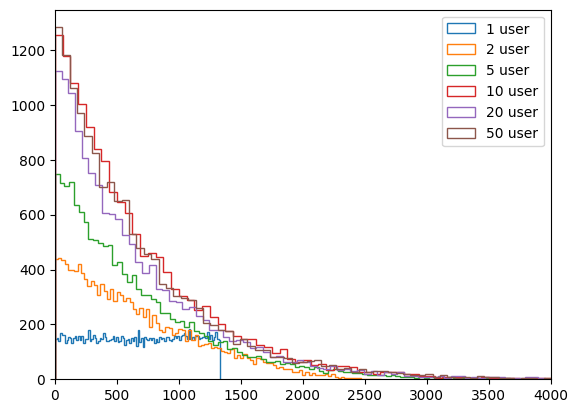

In [15]:
import simstudy3

simstudy3.task_3_5_1()

### Task 3.5.2: Arrival and Processing Rates of Several Users or Servers.

For each combination of 1, 2 or 3 servers and 2, 4 or 6 users, create boxplots of average global
arrival rate per run and average number of busy servers per run. Each user has an exponential
arrival process with a rate 0.001 pkt/ms. Serving times of each server are distributed exponentially with the rate 0.0015 pkt/ms. Hint: you can show 6 boxplots in total, 2 for each number
of servers: average arrival rates and average number of busy servers.

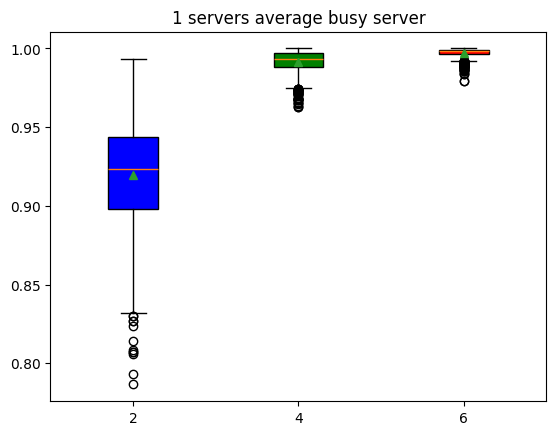

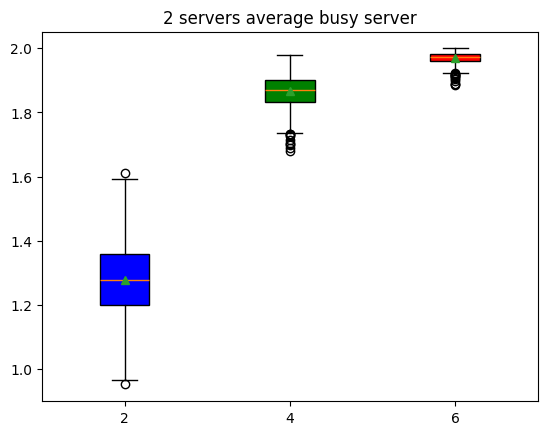

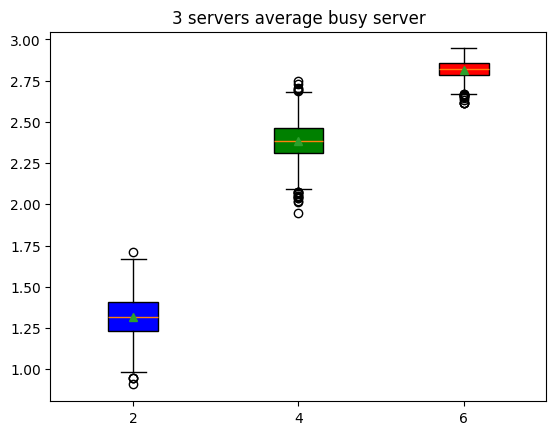

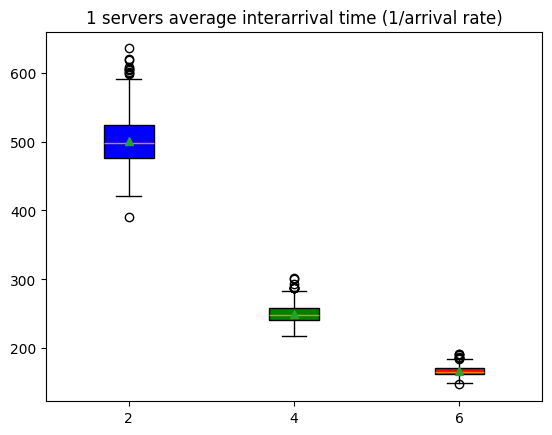

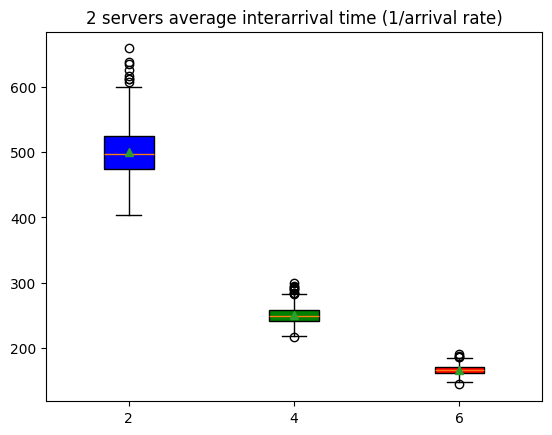

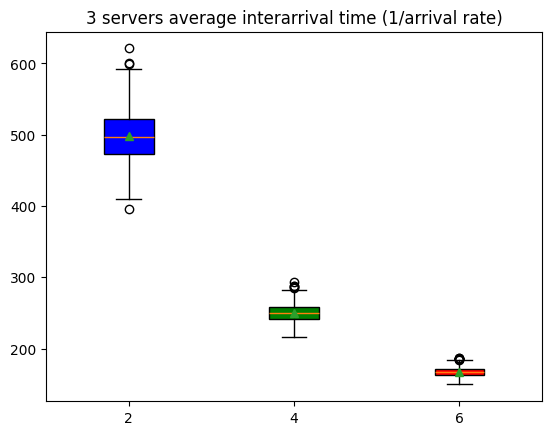

In [14]:
# I had issues separating the plot. So for simplification I decided to just separate the function run for each plot
import matplotlib.pyplot as plt

simstudy3.task_3_5_2(1,True)
simstudy3.task_3_5_2(2,True)
simstudy3.task_3_5_2(3,True)

# It is undefined here if we should show interarrival time or arrival rate. As the assignment says arrival rate but the implemented function is iat, I decided to go with iat
# if arrival rate is asked instead, just need to do 1/average iat
simstudy3.task_3_5_2(1,False)
simstudy3.task_3_5_2(2,False)
simstudy3.task_3_5_2(3,False)

## Analysis and General Questions

### Task 3.6.1: Seed for Random Number Generation

Why does it make sense to use a seed when simulating a non-deterministic system?

It make sense to use a seed to make the system deterministic. This is particularly useful to ensure reproducability or make sure that randomness does not cause major differences between simulation with different parameters. There will be lots of cases where randomness causes the analysis process to be harder as we are unsure how it affects the whole system so reproducability is an important aspects of simulation

### Task 3.6.2: Choosing the right number of bins

Explain the numbers of bins you choose for the histograms in task 3.5.1. How does the shape
of the histograms change if you reduce/increase the number of bins?

I started with the square root method which gave me the value of 122 bins for 15000 observations. From there I reduced the number of bins to 100 as there are still lots of standalone peaks in the diagram. Theoretically, I can still reduce the number of bins more according to other theories of determining number of bins but I saw that for the case of 1 user the range of possible values is lower than the case of multiple user so this is the compromise that I choose. If the number of bins is too low for the higher number of users, since the range of values is large it gets too smooth and you cannot determine the distribution. 

The shape of the histogram smooths out more when you reduce the number of bins and it creates a more bumpy (higher number of peaks and valleys) diagram when you increase the number of bins. This is because less bins mean broader bins (each bin covers a wider range of data values) and more bins mean narrower bins (covers narrower range of data values). This is then a case of tradeoff between overgeneralization (too little bins) and potential noise (too much bins)

### Task 3.6.3: Arrivals Distribution

Which distribution does the accumulated packet arrivals in task 3.5.1 seem to follow when you
increase number of users? Test your hypothesis using Chi-Square test with the significance
level 5%. The parameters of the distribution can be estimated from samples. Describe your
observation and discuss the reasons of such behaviour. How do the observations change if you
change the significance level to 15%?

When the number of users increase, the distribution started to resemble more of an exponential function. This is proven by the chi-square test with both significance of 0.05 and 0.15. The result can be attributed as the combination of the multiple uniform distributions. As all the distributions are independent, all of them are equally likely to pull a number from the starting ranges. The probability can then be considered as a multiplication (e.g. probability that the iat time is high is equal to probability that all of them did not arrive multiple times). When we multiply all of these pdf together, it will then create something similar to an exponent function which can be viewed in the simulation above

### Task 3.6.4: Average Arrival Rate and Number of Busy Servers

How do you interpret the results from task 3.5.2? What is the expected average number of busy servers if you simulate for an infinite simulation time? What happens, if S becomes unlimited?

For the arrival rate, I am unsure what to interpret from it but basically what I observed for the number of busy servers is that the percentage of busy servers similar to the utilization rate which is number of server * server processing rate / number of users * users arrival rate. For example, in the case of 3 servers and 4 users, the utilization is 0.003/0.0045 which is 2/3 meaning that the expected average number of busy server should be around 2.

If you simulate for an infinite simulation time, then the results will show more precise results (approach theoretical value) which would mean that it should be closer to the expected utilization.